# THE SPARKS FOUNDATION  GRIP

#   Exploratory Data Analysis Task 3 

### problem statement

#### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

In [3]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading a dataset 

In [5]:
df_matches = pd.read_csv('matches.csv')
df_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
df_delivery = pd.read_csv('deliveries.csv')
df_delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [6]:
df_matches.drop(labels = ['city', 'date', 'dl_applied', 'player_of_match',
                                       'venue', 'umpire1', 'umpire2', 'umpire3'], axis = 1, inplace = True)
df_matches

,id,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0
...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9
752,11412,2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6
753,11413,2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2
754,11414,2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6


In [246]:

print('Total matches in the dataset :')

df_matches['id'].count()

Total matches in the dataset :


636

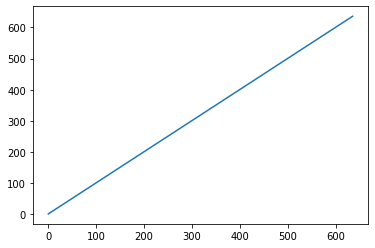

In [278]:
df_matches['id'].plot(kind='line')

In [248]:
print('Total seasons in the dataset :')

df_matches['season'].value_counts().count()

Total seasons in the dataset :


10

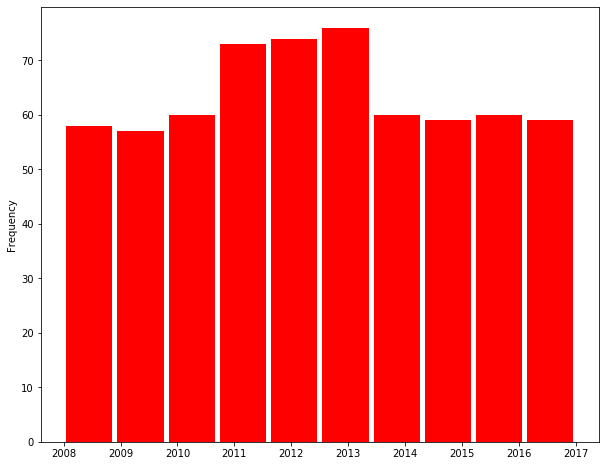

In [249]:
# To print the season value for each bar in histogram

x_axis = df_matches['season'].value_counts().index

# Plotting the histogram

plt.figure(figsize=(10,8))
df_matches['season'].plot(kind='hist', rwidth= 0.9, color = 'r', xticks = x_axis)

In [250]:

print('Team won by maximum runs : Mumbai Indians')

df_matches[ (df_matches['win_by_runs'] == df_matches['win_by_runs'].max())
          & (df_matches['result'] == 'normal')]

Team won by maximum runs : Mumbai Indians


,id,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
43,44,2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,Mumbai Indians,146,0


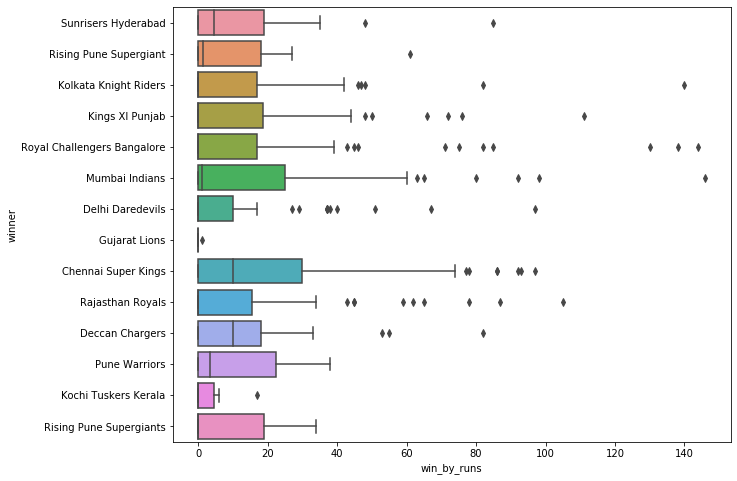

In [251]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x = df_matches['win_by_runs'] , y = df_matches['winner'] )

# In the boxplot we can see the highest value against Mumbai Indians justifying that they have won by maximum runs

In [252]:
print('Teams won by maximum wickets :')

df_matches[ (df_matches['win_by_wickets'] == df_matches['win_by_wickets'].max()) 
           & (df_matches['result'] == 'normal')]

Teams won by maximum wickets :


,id,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10
34,35,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,10
71,72,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,Deccan Chargers,0,10
119,120,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,Delhi Daredevils,0,10
183,184,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10
298,299,2011,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,Rajasthan Royals,0,10
376,377,2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,Mumbai Indians,0,10
390,391,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,10
542,543,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10
590,591,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,10


##### 9 teams have won 10 times by maximum wickets (that is 10 wickets)
##### Royal Challengers Bangalore have won twice by maximum wickets

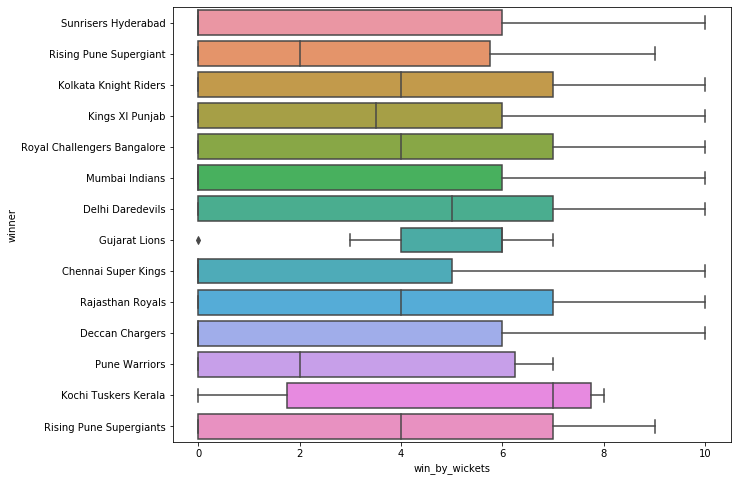

In [254]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x = df_matches['win_by_wickets'] , y = df_matches['winner'] )

# In the boxplot we can see the highest value against 9 teams justifying that they have won by maximum wickets

In [255]:
print('Teams won by minimum runs :')

df_min_runs = df_matches[ (df_matches['win_by_runs'] == df_matches['win_by_runs'].min()) 
                    & (df_matches['result'] == 'normal') ]
df_min_runs

Teams won by minimum runs :


,id,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6
5,6,2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,9
6,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4
...,...,...,...,...,...,...,...,...,...,...
628,629,2016,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,Rising Pune Supergiants,0,4
629,630,2016,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,Gujarat Lions,0,6
631,632,2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,6
632,633,2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,4


##### All teams have won by closest margin (that is 0 runs) several times. Below is the number of times each team has won with 0 runs

In [256]:
df_min_runs['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

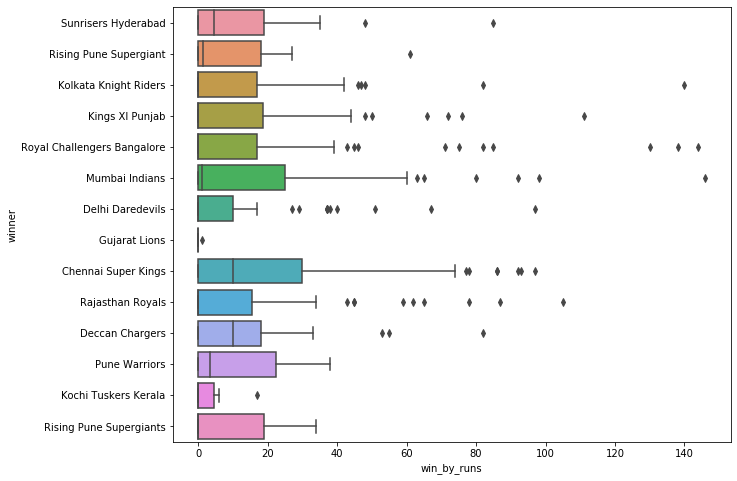

In [257]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x = df_matches['win_by_runs'] , y = df_matches['winner'] )

In [258]:
print('Teams won by minimum wickets :')

df_min_wickets = df_matches[ (df_matches['win_by_wickets'] == df_matches['win_by_wickets'].min()) 
                    & (df_matches['result'] == 'normal') ]
df_min_wickets

Teams won by minimum wickets :


,id,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0
8,9,2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Delhi Daredevils,97,0
13,14,2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Kolkata Knight Riders,17,0
14,15,2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,Delhi Daredevils,51,0
...,...,...,...,...,...,...,...,...,...,...
624,625,2016,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,Rising Pune Supergiants,19,0
625,626,2016,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,Royal Challengers Bangalore,82,0
630,631,2016,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Kolkata Knight Riders,22,0
633,634,2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Sunrisers Hyderabad,22,0


##### All teams have won with minimum wickets (that is 0 wickets) several times. Below is the number of times each team has won with 0 wicket

In [259]:
df_min_wickets['winner'].value_counts()

Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Rajasthan Royals               23
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

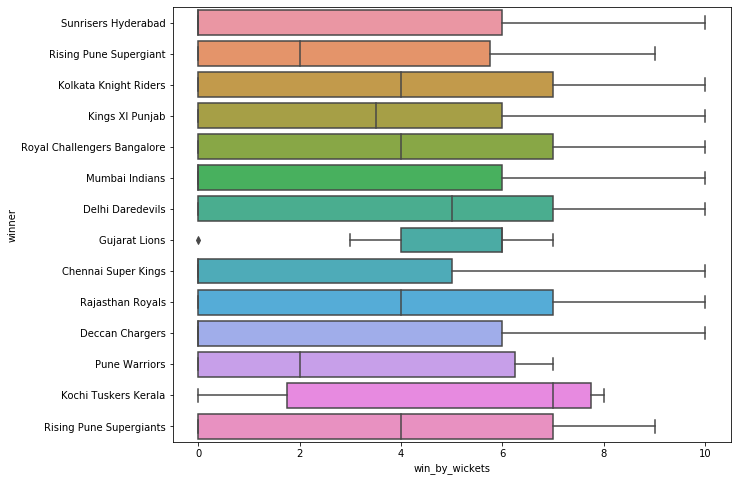

In [260]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x = df_matches['win_by_wickets'] , y = df_matches['winner'] )


In [261]:

print('Season with maximum number of matches :')

print(df_matches['season'].value_counts().head(1))

print()
print('Season "2013" has 76 matches played which is the most number of matches played in single season')

Season with maximum number of matches :
2013    76
Name: season, dtype: int64

Season "2013" has 76 matches played which is the most number of matches played in single season


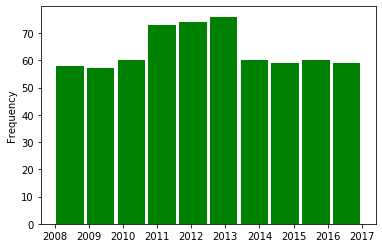

In [262]:
df_matches['season'].plot(kind='hist', rwidth= 0.9, color = 'g', xticks = x_axis)

# The bar representing 2013 has the highest length

In [263]:

print('Most successful IPL Team :')

print(df_matches['winner'].value_counts().head(1))
print()

print('Mumbai Indians is the most successful team because of winning 92 matches')

Most successful IPL Team :
Mumbai Indians    92
Name: winner, dtype: int64

Mumbai Indians is the most successful team because of winning 92 matches


[92 79 77 73 70 63 62 42 29 13 12 10  6  5]


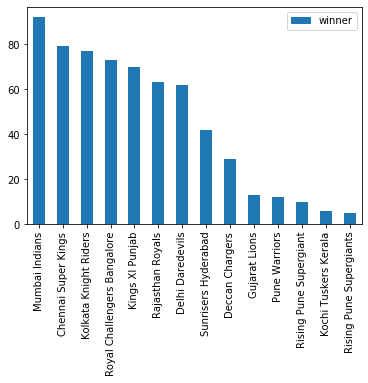

In [264]:
x = pd.DataFrame(df_matches['winner'].value_counts())
print(x['winner'].values)

x.plot(kind='bar')

# The bar representing Mumbai Indians has the highest length

In [265]:
df_matches[df_matches.winner == df_matches.toss_winner]

,id,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0
5,6,2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,9
...,...,...,...,...,...,...,...,...,...,...
629,630,2016,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,Gujarat Lions,0,6
631,632,2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,6
632,633,2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,4
634,635,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,4


In [266]:
df_matches[df_matches.winner == df_matches.toss_winner]['result'].value_counts()

normal    322
tie         3
Name: result, dtype: int64

##### As seen above, 325 matches out of total 636 matches were won after winning the toss. 
##### Also, out of 325 matches, there was a tie between 2 teams in 3 matches.
##### So, actual matches won by winning the toss = 322 / 636
##### Around 50% matches were won by the teams who won the toss
##### Hence, we cannot say that Toss-winning has always helped in winning matches

#  THANKYOU 